Exploratory Data Analysis (EDA) - Univariate Analysis

Univariate analysis is the first step in Exploratory Data Analysis (EDA), where we analyze a single variable (column) in a dataset. This helps in understanding the distribution, central tendency, and spread of the data.

Types of Data in Univariate Analysis

Numerical Data (Continuous/Discrete)

Example: Age, Salary, Height, Marks

Analyzed using histograms, box plots, descriptive statistics

Categorical Data

Example: Gender (Male/Female), Country (India, USA)

Analyzed using bar plots, pie charts, frequency tables

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import pandas as pd

df = pd.read_csv("/content/train.csv")  # Ensure correct file path
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Categorical Dataset

a) countplot and pie chart

<Axes: xlabel='Survived'>

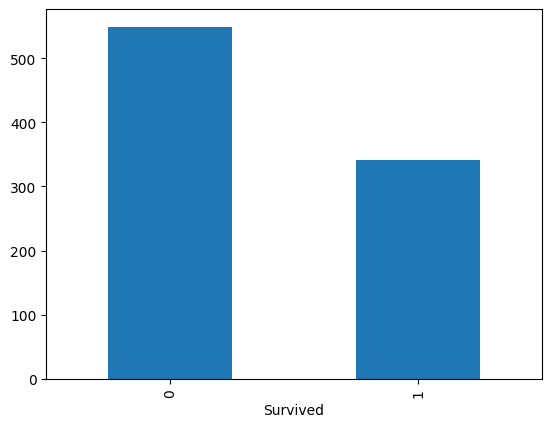

In [19]:
#sns.countplot(df['Survived'])
df['Survived'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

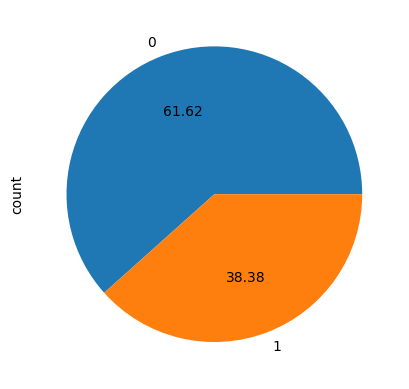

In [20]:
df['Survived'].value_counts().plot(kind='pie', autopct='%.2f')

<Axes: xlabel='Embarked'>

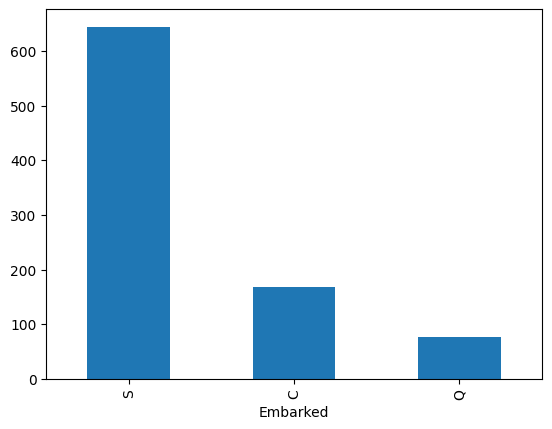

In [17]:
#sns.countplot(df['Pclass'])
df['Embarked'].value_counts().plot(kind='bar')

2. Numerical Data

Histogram  & boxplot & distplot

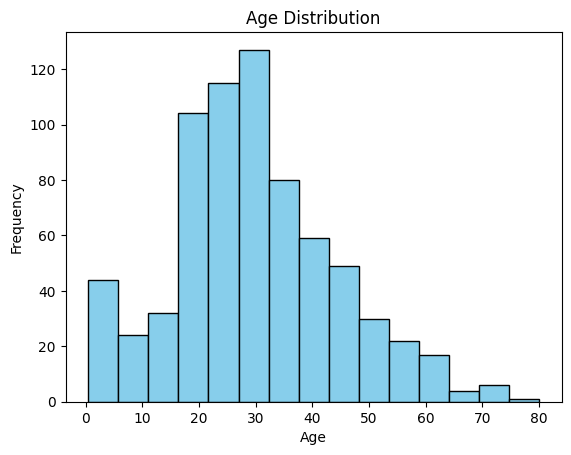

In [24]:
plt.hist(df['Age'], bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

distplot->probabilty density function

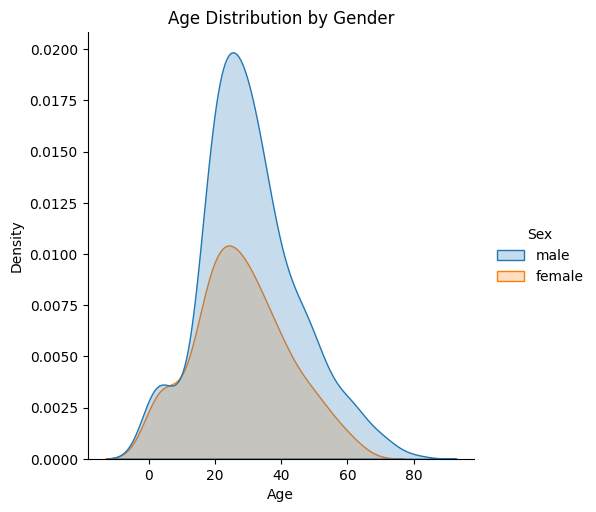

In [25]:
sns.displot(df, x="Age", hue="Sex", kind="kde", fill=True)
plt.title("Age Distribution by Gender")
plt.show()


🔹 What It Shows:

Age distribution for males vs. females.

Helps compare median age and spread between groups.

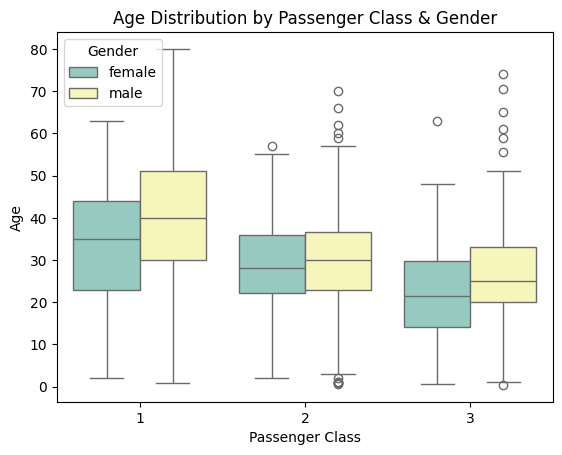

In [26]:
sns.boxplot(x="Pclass", y="Age", hue="Sex", data=df, palette="Set3")

plt.title("Age Distribution by Passenger Class & Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Age")
plt.legend(title="Gender")
plt.show()


Breakdown:

Shows age distribution by Passenger Class (Pclass).

Hue (hue="Sex") differentiates between males & females.

Palette="Set3" adds soft pastel colors.



In [28]:
df['Age'].skew()

np.float64(0.38910778230082704)

Bivariate & Multivariate Analysis in EDA

When performing Exploratory Data Analysis (EDA), we analyze relationships between multiple variables.

✅ 1. Bivariate Analysis (Two Variables)
Bivariate analysis explores the relationship between two variables. It can be:

Numerical vs. Numerical → Correlation, Scatterplots

Categorical vs. Numerical → Boxplots, Violin Plots

Categorical vs. Categorical → Countplots, Heatmaps

In [30]:
tips = sns.load_dataset('tips')

In [31]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

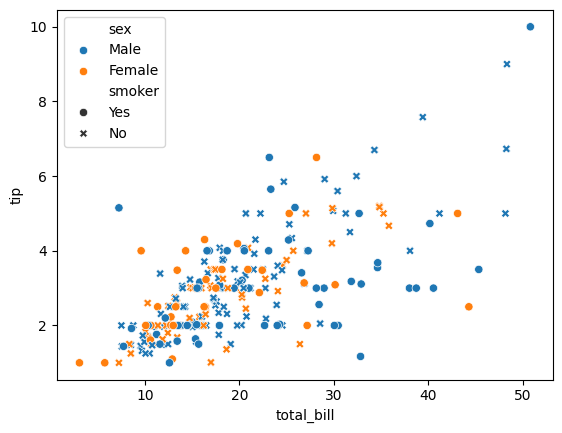

In [37]:
sns.scatterplot(x="total_bill", y="tip",hue='sex',style='smoker', data=tips)

In [38]:
titanic = pd.read_csv('train.csv')

In [41]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Pclass', ylabel='Fare'>

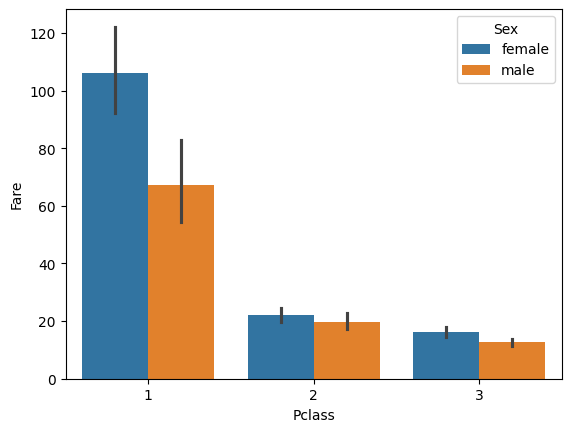

In [45]:
sns.barplot(x='Pclass' , y='Fare',hue='Sex', data = titanic)

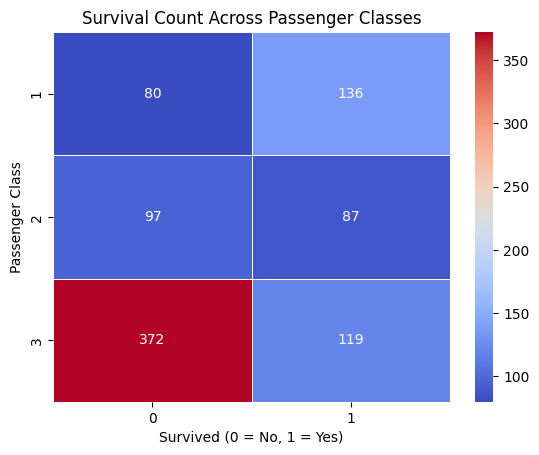

In [47]:
# Create a pivot table for Survived vs Pclass
survival_rates = titanic.pivot_table(index="Pclass", columns="Survived", aggfunc="size")

# Plot the heatmap
sns.heatmap(survival_rates, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5)

plt.title("Survival Count Across Passenger Classes")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Passenger Class")
plt.show()

In [50]:
crosstab_result = pd.crosstab(titanic['Pclass'],titanic['Survived'])

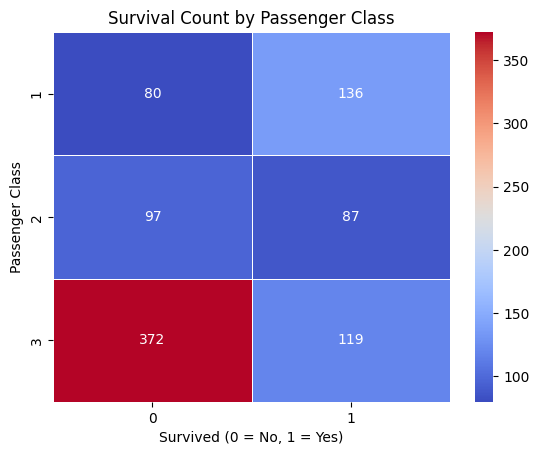

In [51]:
sns.heatmap(crosstab_result, annot=True, cmap="coolwarm", fmt="d", linewidths=0.5)

plt.title("Survival Count by Passenger Class")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Passenger Class")
plt.show()


In [39]:
flights = sns.load_dataset('flights')

In [42]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [55]:
# Calculate survival rate by gender
survival_rate_by_gender = titanic.groupby("Sex")["Survived"].mean() * 100
survival_rate_by_gender

,Survived
Sex,
female,74.203822
male,18.890815


In [40]:
iris = sns.load_dataset('iris')

In [43]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


lect numeric columns → pclass, survived, age, fare.

data.corr() → Computes correlation between columns.

sns.clustermap() → Clusters similar variables together based on correlation.

annot=True → Shows correlation values inside the heatmap.

cmap="coolwarm" → Uses a red-blue gradient for visualization.

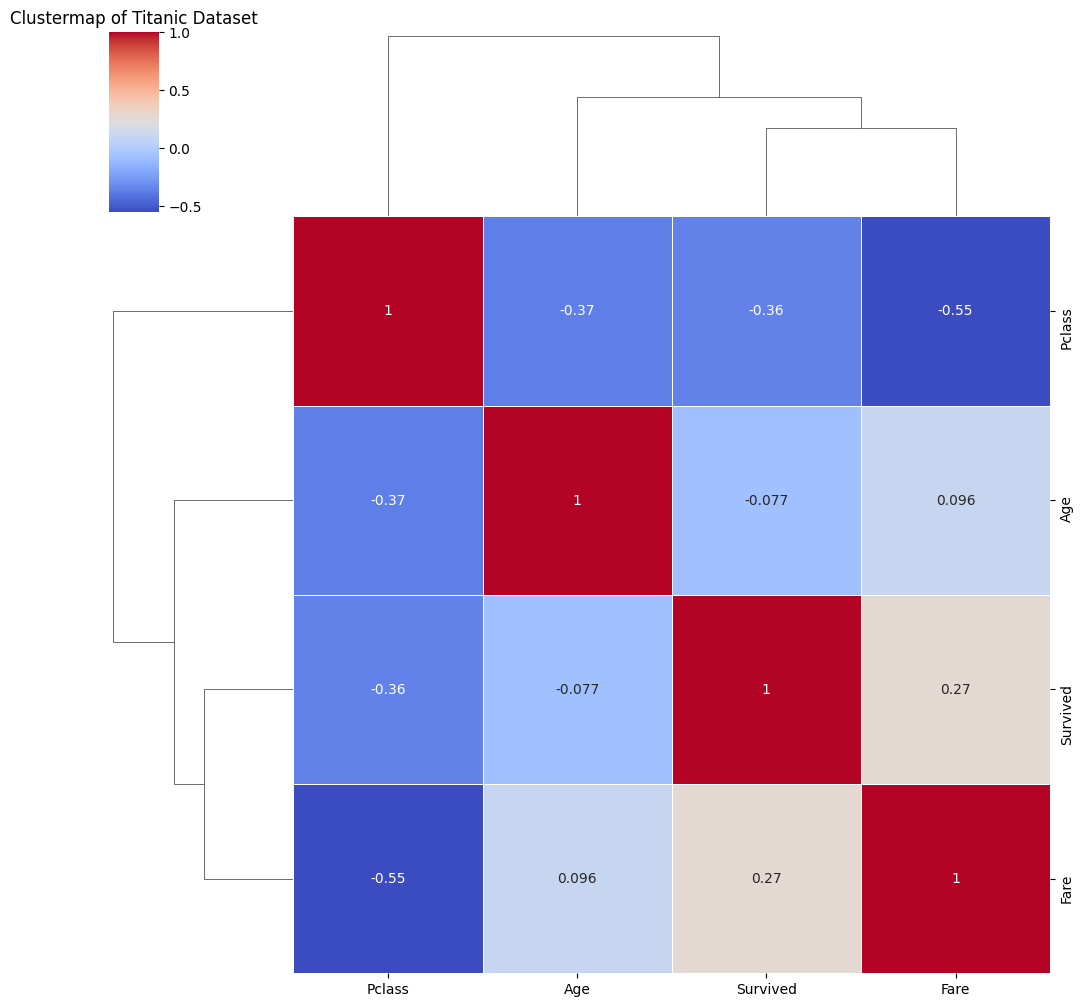

In [57]:
# Select relevant numeric columns for clustering
data = titanic[["Pclass", "Survived", "Age", "Fare"]].dropna()

# Create a Clustermap
sns.clustermap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Clustermap of Titanic Dataset")
plt.show()

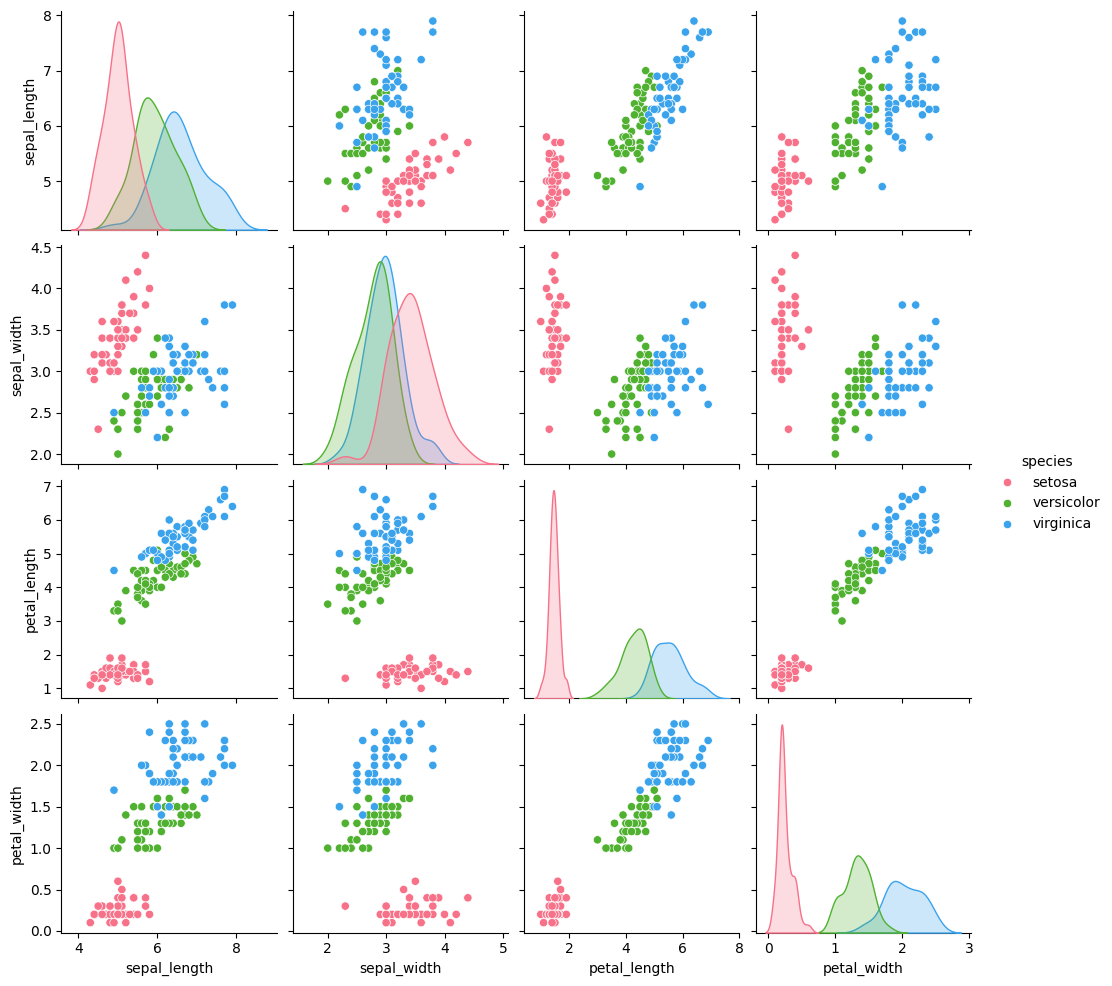

In [58]:
sns.pairplot(iris, hue="species", palette="husl")

# Show plot
plt.show()

<ipython-input-59-d76debabb367>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="year", y="passengers", data=flights, marker="o", ci=None)


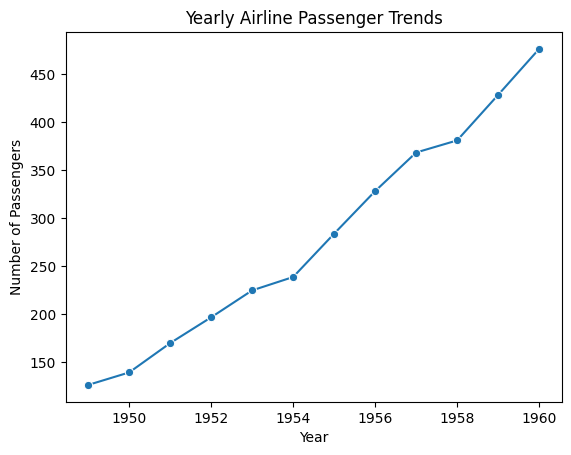

In [59]:

# Create a line plot
sns.lineplot(x="year", y="passengers", data=flights, marker="o", ci=None)

# Add title and labels
plt.title("Yearly Airline Passenger Trends")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")

# Show plot
plt.show()

In [61]:
df=flights.pivot_table(values="passengers" , index="month", columns="year")
df

<ipython-input-61-28def5268ef1>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df=flights.pivot_table(values="passengers" , index="month", columns="year")


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

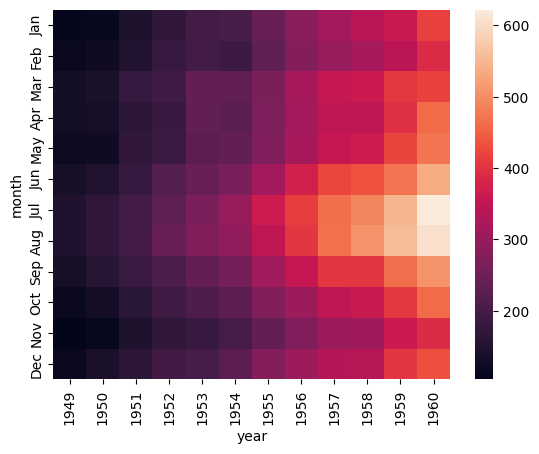

In [62]:
sns.heatmap(df)